# Classify Handwritten Digits

## 1. Load The Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [ ]:
# Load the digits dataset
digits = load_digits()
X, y = digits.data, digits.target

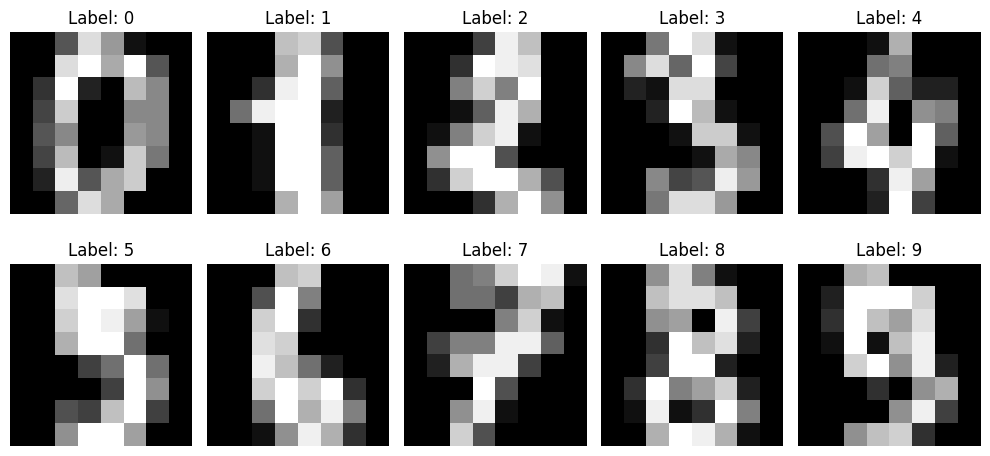

In [ ]:
# Display digits from 1 to 10
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Information about the dataset
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Distribution of digits:\n{np.bincount(y)}")

Dataset shape: (1797, 64)
Number of classes: 10
Distribution of digits:
[178 182 177 183 181 182 181 179 174 180]


## 2. Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Images are already flattened (8x8 = 64 features) no need to reshape

In [ ]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Train The Models

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import time

In [10]:
model_results = {}

In [12]:
def evaluate_model(model, name, X_train, X_test, y_train, y_test):
    """
    Function to evaluate model performance.
    Records the result in the model_results dictionary.

    Args:
        model: model to evaluate
        name: name of the model
        X_train: training data
        X_test: testing data
        y_train: training labels
        y_test: testing labels

    Returns:
        model: trained model
        accuracy: accuracy score
        cm: confusion matrix
    """
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    start_time = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    model_results[name] = {
        'model': model,
        'accuracy': accuracy,
        'train_time': train_time,
        'pred_time': pred_time,
        'predictions': y_pred
    }
    
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Training time: {train_time:.4f} seconds")
    print(f"Prediction time: {pred_time:.4f} seconds")
    print("-" * 50)
    
    return model, accuracy, cm

In [13]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=5000, random_state=42)
lr_model, lr_acc, lr_cm = evaluate_model(lr_model, "Logistic Regression", X_train_scaled, X_test_scaled, y_train, y_test)

Logistic Regression Results:
Accuracy: 0.9722
Training time: 0.0442 seconds
Prediction time: 0.0010 seconds
--------------------------------------------------


In [14]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model, knn_acc, knn_cm = evaluate_model(knn_model, "K-Nearest Neighbors", X_train_scaled, X_test_scaled, y_train, y_test)

K-Nearest Neighbors Results:
Accuracy: 0.9639
Training time: 0.0017 seconds
Prediction time: 0.0285 seconds
--------------------------------------------------


In [15]:
## Support Vector Machine
svm_model = SVC(kernel='rbf', C=10, gamma=0.001, random_state=42)
svm_model, svm_acc, svm_cm = evaluate_model(svm_model, "Support Vector Machine", X_train_scaled, X_test_scaled, y_train, y_test)

Support Vector Machine Results:
Accuracy: 0.9889
Training time: 0.0217 seconds
Prediction time: 0.0157 seconds
--------------------------------------------------


In [16]:
## Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model, rf_acc, rf_cm = evaluate_model(rf_model, "Random Forest", X_train_scaled, X_test_scaled, y_train, y_test)

Random Forest Results:
Accuracy: 0.9639
Training time: 0.1807 seconds
Prediction time: 0.0039 seconds
--------------------------------------------------


In [17]:
# Neural Network (MLP)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model, mlp_acc, mlp_cm = evaluate_model(mlp_model, "Neural Network (MLP)", X_train_scaled, X_test_scaled, y_train, y_test)

Neural Network (MLP) Results:
Accuracy: 0.9750
Training time: 0.2873 seconds
Prediction time: 0.0002 seconds
--------------------------------------------------


## 4. Compare The Models

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [28]:
# Sort models by accuracy
sorted_results = sorted(model_results.items(), key=lambda x: x[1]['accuracy'], reverse=True)
best_model_name = sorted_results[0][0]
best_model = sorted_results[0][1]['model']
best_model_acc = sorted_results[0][1]['accuracy']
for name, results in sorted_results:
    print(f"Model: {name}")
    print(f"Accuracy: {results['accuracy']:.4f}")
    print(f"Training time: {results['train_time']:.4f} seconds")
    print(f"Prediction time: {results['pred_time']:.4f} seconds")
    print("-" * 50)

Model: Support Vector Machine
Accuracy: 0.9889
Training time: 0.0217 seconds
Prediction time: 0.0157 seconds
--------------------------------------------------
Model: Neural Network (MLP)
Accuracy: 0.9750
Training time: 0.2873 seconds
Prediction time: 0.0002 seconds
--------------------------------------------------
Model: Logistic Regression
Accuracy: 0.9722
Training time: 0.0442 seconds
Prediction time: 0.0010 seconds
--------------------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.9639
Training time: 0.0017 seconds
Prediction time: 0.0285 seconds
--------------------------------------------------
Model: Random Forest
Accuracy: 0.9639
Training time: 0.1807 seconds
Prediction time: 0.0039 seconds
--------------------------------------------------


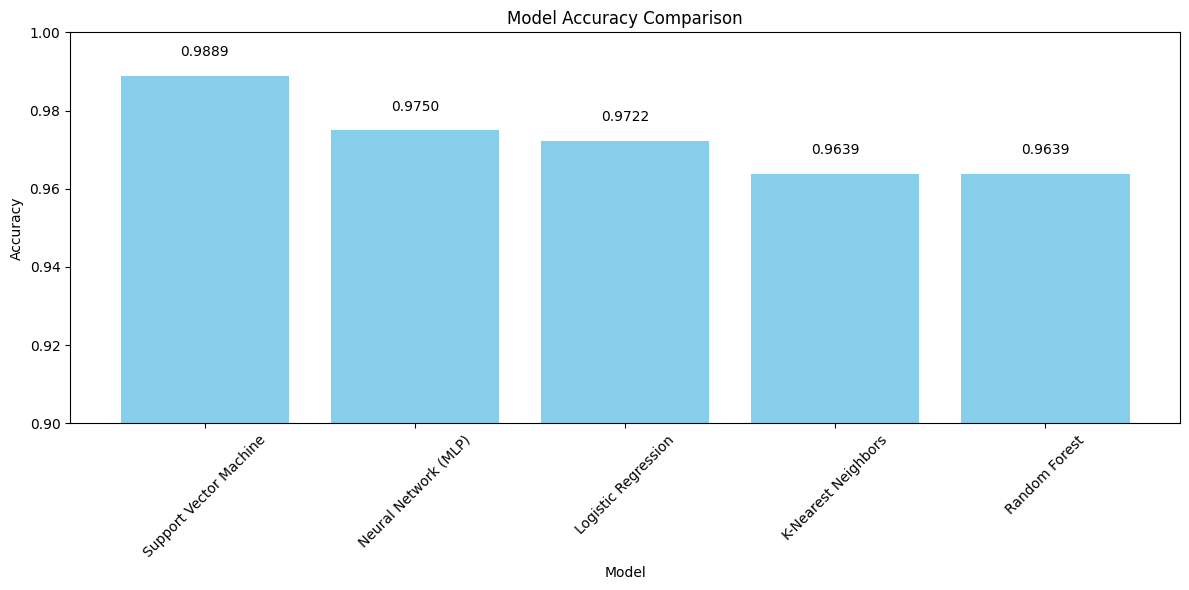

In [ ]:
# Bar plot of model accuracies
plt.figure(figsize=(12, 6))
model_names = [model[0] for model in sorted_results]
accuracies = [model[1]['accuracy'] for model in sorted_results]
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center')
plt.tight_layout()
plt.show()

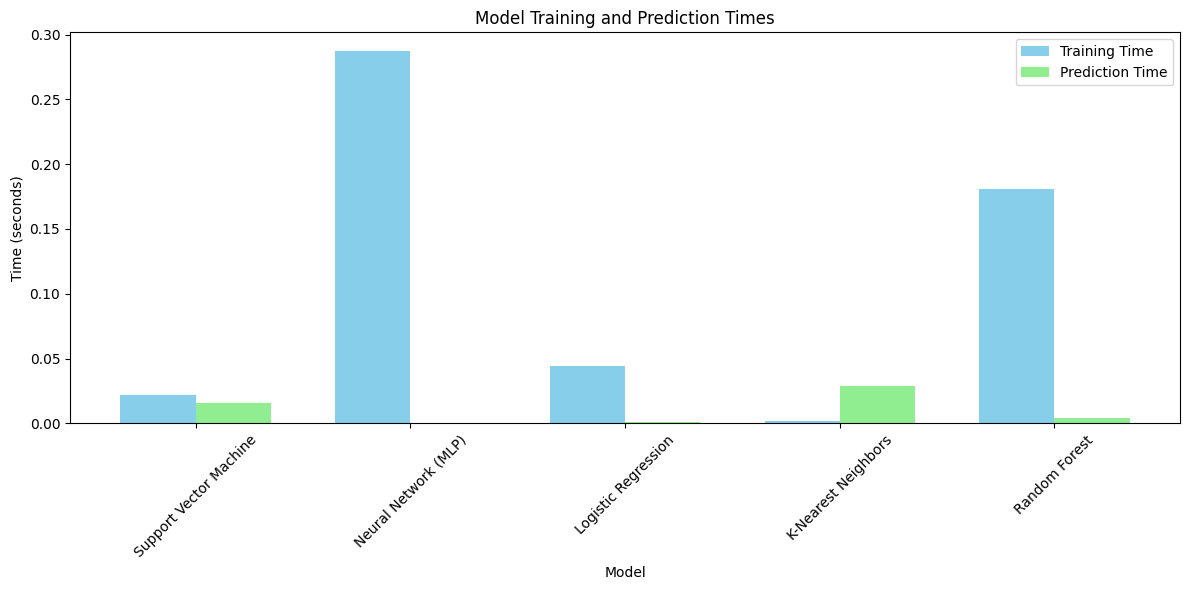

In [29]:
# Training and prediction times comparison
plt.figure(figsize=(12, 6))
train_times = [model[1]['train_time'] for model in sorted_results]
pred_times = [model[1]['pred_time'] for model in sorted_results]
x = np.arange(len(model_names))
width = 0.35
plt.bar(x - width/2, train_times, width, label='Training Time', color='skyblue')
plt.bar(x + width/2, pred_times, width, label='Prediction Time', color='lightgreen')
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.title('Model Training and Prediction Times')
plt.xticks(x, model_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## 5. Best Model Analysis (SVM)

In [34]:
# Detailed classification report
print(f"Best Model: {best_model_name}")
best_pred = model_results[best_model_name]['predictions']
print("Classification Report:")
print(classification_report(y_test, best_pred))

Best Model: Support Vector Machine
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.97      1.00      0.99        36
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        36
           7       0.97      1.00      0.99        36
           8       1.00      0.94      0.97        35
           9       1.00      0.97      0.99        36

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



In [ ]:
# Plot confusion matrix for the best model
plt.figure(figsize=(10, 8))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, best_pred), display_labels=range(10))
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.tight_layout()
plt.show()

## 6. Visualize Misclassifications

In [35]:
# Find indices of misclassified samples
misclassified_idx = np.where(best_pred != y_test)[0]

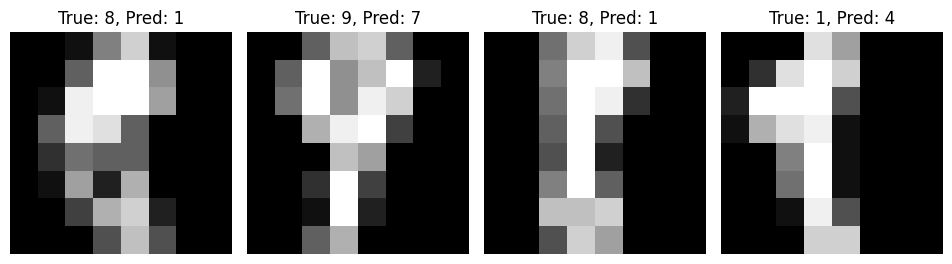

In [36]:
# Display some misclassified examples
if len(misclassified_idx) > 0:
    plt.figure(figsize=(12, 8))
    num_examples = min(15, len(misclassified_idx))
    for i in range(num_examples):
        idx = misclassified_idx[i]
        plt.subplot(3, 5, i + 1)
        # Convert back to 8x8 image
        img_idx = np.where((digits.data == X_test[idx]).all(axis=1))[0][0]
        plt.imshow(digits.images[img_idx], cmap='gray')
        plt.title(f'True: {y_test[idx]}, Pred: {best_pred[idx]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("No misclassifications found in the test set!")

## 7. Hyperparameter Tuning

In [37]:
# This code defines the parameter grid for each model for hyperparameter tuning
# and the model to use for tuning

if best_model_name == "Support Vector Machine":
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'gamma': [0.01, 0.001, 0.0001],
        'kernel': ['rbf', 'linear']
    }
    tuning_model = SVC(random_state=42)
    
elif best_model_name == "K-Nearest Neighbors":
    param_grid = {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    }
    tuning_model = KNeighborsClassifier()
    
elif best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
    tuning_model = RandomForestClassifier(random_state=42)
    
elif best_model_name == "Neural Network (MLP)":
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01]
    }
    tuning_model = MLPClassifier(max_iter=1000, random_state=42)
    
elif best_model_name == "Logistic Regression":
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga', 'lbfgs'],
        'penalty': ['l1', 'l2']
    }
    tuning_model = LogisticRegression(max_iter=5000, random_state=42)

Best model is SVG.
Now we will use GridSearchCV to tune the hyperparameters

In [41]:
# Perform grid search
grid_search = GridSearchCV(tuning_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [42]:
# Best parameters and results
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

Best parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9833


In [43]:
# Evaluate the tuned model
tuned_model = grid_search.best_estimator_
y_tuned_pred = tuned_model.predict(X_test_scaled)
tuned_acc = accuracy_score(y_test, y_tuned_pred)
print(f"Tuned model test accuracy: {tuned_acc:.4f}")
print(f"Improvement over base model: {tuned_acc - best_model_acc:.4f}")

Tuned model test accuracy: 0.9833
Improvement over base model: -0.0056


<Figure size 1000x800 with 0 Axes>

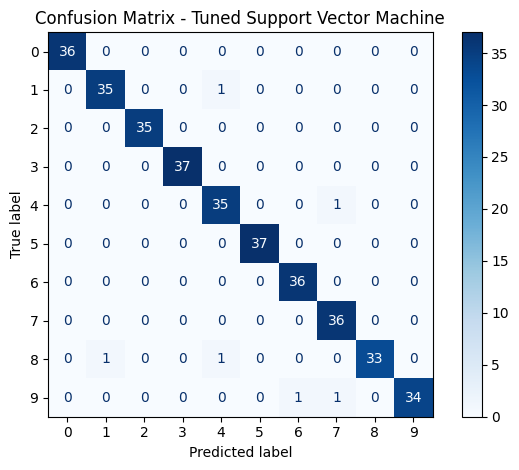

In [ ]:
# Confusion matrix for the tuned model
plt.figure(figsize=(10, 8))
cm_tuned_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_tuned_pred), display_labels=range(10))
cm_tuned_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f'Confusion Matrix - Tuned {best_model_name}')
plt.tight_layout()
plt.show()

## 8. Visualize Predictions

In [45]:
plt.figure(figsize=(10, 10))
plt.suptitle("Sample of Correct Predictions", fontsize=16)

Text(0.5, 0.98, 'Sample of Correct Predictions')

<Figure size 1000x1000 with 0 Axes>

In [46]:
# Find correctly classified examples
correct_idx = np.where(y_tuned_pred == y_test)[0]
np.random.seed(42)
sample_correct = np.random.choice(correct_idx, size=min(16, len(correct_idx)), replace=False)

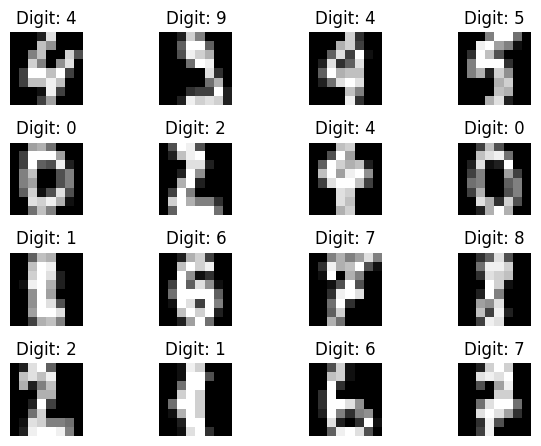

In [47]:
for i, idx in enumerate(sample_correct):
    if i >= 16:  # Show at most 16 examples
        break
    plt.subplot(4, 4, i + 1)
    # Map back to original image
    img_idx = np.where((digits.data == X_test[idx]).all(axis=1))[0][0]
    plt.imshow(digits.images[img_idx], cmap='gray')
    plt.title(f'Digit: {y_test[idx]}')
    plt.axis('off')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [49]:
# Conclusion
print("\nConclusion:")
print(f"The best model for this digit classification task is the tuned {best_model_name}.")
print(f"It achieved an accuracy of {tuned_acc:.4f} on the test set.")


Conclusion:
The best model for this digit classification task is the tuned Support Vector Machine.
It achieved an accuracy of 0.9833 on the test set.
